In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
import os
os.getcwd()

'D:\\B2B_Git_Instance\\Pytorch_basic_templates'

In [4]:
train = datasets.CIFAR10(root = os.getcwd(),train = True, download = True, transform = transform )

Files already downloaded and verified


In [5]:
test = datasets.CIFAR10(root = os.getcwd(),train = False, download = True, transform = transform )

Files already downloaded and verified


In [6]:
train_data = DataLoader(train, batch_size = 10, shuffle = True)
test_data = DataLoader(test, batch_size = 10, shuffle = False)

In [7]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
for img, lbl in train_data:
    break

the img is deer 


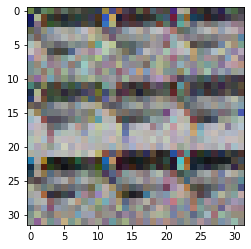

In [9]:
data_point = 9
print(f"the img is {classes[lbl[data_point]]} ")
plt.imshow(img[data_point].numpy().reshape((32,32,-1)))

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1) #out_channel = no of filters, kernel_size = filter dim 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(6*6*16,120) # out_channels from conv1, in/out_channel from conv2
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10) # output as 10 classes
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*6*6)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim = 1)

In [11]:
(((((((((32-3)+1)-2)//2)+1)-3)+1)-2)//2)+1

6

In [12]:
model = CNN()
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
for param in model.parameters():

    print(param.numel())

162
6
864
16
69120
120
10080
84
840
10


In [14]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=1e-3)


In [25]:
epochs = 10
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    test_corr = 0
    
    
    for batch, (X_train, y_train) in enumerate(train_data):
        batch = batch+1
        y_pred = model(X_train)
        losses = loss(y_pred,y_train)
        pred = torch.max(y_pred.data,1)[1]
        
        batch_corr = (pred == y_train).sum() # True 1 / False 0
        
        trn_corr = trn_corr+batch_corr
         
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        if batch%600 == 0:
            print(f'Epoch {i} batch {batch} and loss {losses} and accuracy is {trn_corr.item()*100/(10*batch)}%')
    train_loss.append(losses)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_data):
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            
            test_corr = test_corr + (predicted == y_test).sum()
        losses = loss(y_val, y_test)
        test_loss.append(losses)
        test_correct.append(test_corr)

Epoch 0 batch 600 and loss 0.5738364458084106 and accuracy is 76.11666666666666%
Epoch 0 batch 1200 and loss 0.49709635972976685 and accuracy is 75.6%
Epoch 0 batch 1800 and loss 1.4549531936645508 and accuracy is 75.15555555555555%
Epoch 0 batch 2400 and loss 0.46695947647094727 and accuracy is 74.96666666666667%
Epoch 0 batch 3000 and loss 0.9463098645210266 and accuracy is 74.76666666666667%
Epoch 0 batch 3600 and loss 0.7033579349517822 and accuracy is 74.53055555555555%
Epoch 0 batch 4200 and loss 1.0119003057479858 and accuracy is 74.52619047619048%
Epoch 0 batch 4800 and loss 0.5636828541755676 and accuracy is 74.36666666666666%
Epoch 1 batch 600 and loss 0.9222992062568665 and accuracy is 76.86666666666666%
Epoch 1 batch 1200 and loss 0.723483681678772 and accuracy is 76.225%
Epoch 1 batch 1800 and loss 0.3284127116203308 and accuracy is 76.18333333333334%
Epoch 1 batch 2400 and loss 0.3589937686920166 and accuracy is 76.1375%
Epoch 1 batch 3000 and loss 0.3466499447822571 and 

In [26]:
torch.save(model.state_dict(),'Cifar10.pt')

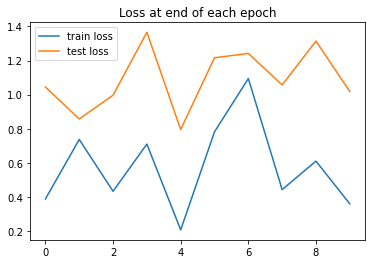

In [27]:
plt.plot(train_loss, label = 'train loss')
plt.plot(test_loss, label = 'test loss')
plt.title("Loss at end of each epoch")
plt.legend();